In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import skimage
import cv2
import seaborn as sns
from PIL import Image, ImageDraw
from pylab import *
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir('/content/')

In [ ]:
pwd

'/content'

In [ ]:
cd drive/

/content/drive


In [ ]:
cd My\ Drive

/content/drive/My Drive


In [ ]:
ls

In [ ]:
dir =  '/content/drive/My Drive/'
file_name = 'randomFolder.zip'

file_check = os.path.isfile(dir+folder_name)
file_check

True

In [ ]:
#!unzip randomFolder

Archive:  randomFolder.zip
   creating: randomFolder/
  inflating: __MACOSX/._randomFolder  
  inflating: randomFolder/projgeomfigs-floor.persp.png  
  inflating: __MACOSX/randomFolder/._projgeomfigs-floor.persp.png  
  inflating: randomFolder/.DS_Store  
  inflating: __MACOSX/randomFolder/._.DS_Store  
  inflating: randomFolder/1viewfigs-keble.006.png  
  inflating: __MACOSX/randomFolder/._1viewfigs-keble.006.png  
  inflating: randomFolder/projgeomfigs-floor.fronto.png  
  inflating: __MACOSX/randomFolder/._projgeomfigs-floor.fronto.png  
   creating: randomFolder/justJPG/
  inflating: __MACOSX/randomFolder/._justJPG  
  inflating: randomFolder/1viewfigs-keble.000.png  
  inflating: __MACOSX/randomFolder/._1viewfigs-keble.000.png  
  inflating: randomFolder/1viewfigs-keble.003.png  
  inflating: __MACOSX/randomFolder/._1viewfigs-keble.003.png  
  inflating: randomFolder/lorenIpsum.jpg.txt  
  inflating: __MACOSX/randomFolder/._lorenIpsum.jpg.txt  


In [ ]:
cd randomFolder/

/content/drive/My Drive/randomFolder


In [ ]:
ls

1viewfigs-keble.000.png  lorenIpsum.jpg.txt
1viewfigs-keble.003.png  projgeomfigs-floor.fronto.png
1viewfigs-keble.006.png  projgeomfigs-floor.persp.png
justJPG/


In [ ]:
folder_name = 'randomFolder'

png_images = []
for file in os.listdir(dir+folder_name):
  if file.endswith('png'):
    png_images.append(file)
  
png_images

['projgeomfigs-floor.persp.png',
 '1viewfigs-keble.006.png',
 'projgeomfigs-floor.fronto.png',
 '1viewfigs-keble.000.png',
 '1viewfigs-keble.003.png']

In [ ]:
new_dir = dir+folder_name+'/justJPG'
os.path.isdir(new_dir)

True

**RESIZING PNG IMAGES AND SAVING AS JPG INTO ANOTHER FOLDER**

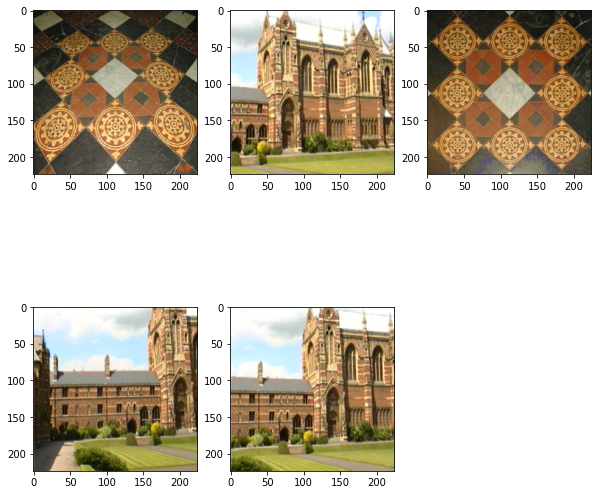

In [ ]:
j = 1
plt.figure(figsize=(10,10))
plt.axis('off')
for i in png_images:
  plt.subplot(2,3,j)
  img = Image.open(i)
  img1 = img.resize((224,224))
  imshow(img1)
  img1.save(new_dir+'/'+i[:-3]+'jpg')
  j += 1

In [ ]:
cd justJPG/

/content/drive/My Drive/randomFolder/justJPG


In [ ]:
ls

1viewfigs-keble.000.jpg  projgeomfigs-floor.fronto.jpg
1viewfigs-keble.003.jpg  projgeomfigs-floor.persp.jpg
1viewfigs-keble.006.jpg


**PLOT A LINE BETWEEN TWO SAME OBJECTS IN FRONT & PERSPECTIVE IMAGE**

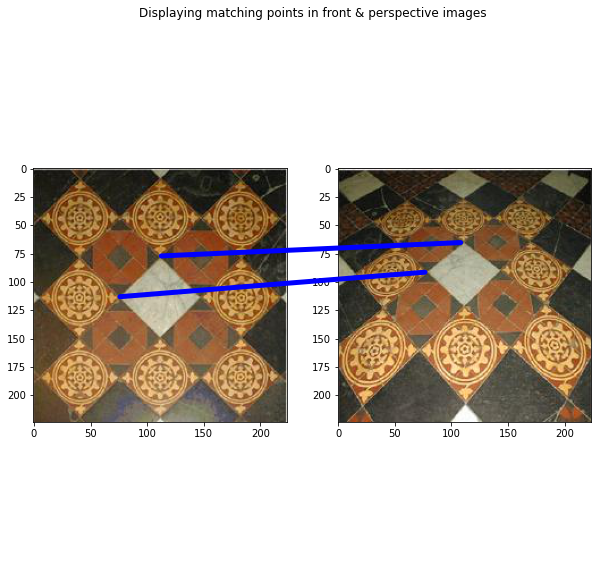

In [ ]:
from matplotlib.patches import ConnectionPatch
#import mpldatacursor

file1 =  'projgeomfigs-floor.fronto.jpg'
file2 =  'projgeomfigs-floor.persp.jpg'

img_front = Image.open(new_dir+'/'+file1)
img_persp = Image.open(new_dir+'/'+file2)

fig = plt.figure(figsize=(10,10))
plt.title('Displaying matching points in front & perspective images')
plt.axis('off')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(img_front)
ax2.imshow(img_persp)

#mpldatacursor.datacursor(hover=True, bbox=dict(alpha=1, fc='w'))


# Draw an arrow between the same point in data coordinates,
# but in different axes.

#Line1
xy = (76,113)
x2y2 = (81,91)
con = ConnectionPatch(
    xyA=xy, coordsA=ax1.transData,
    xyB=x2y2, coordsB=ax2.transData,
    arrowstyle="-", shrinkB=5)
con.set_color('b')
con.set_linewidth(5)

#Line2
xy = (112.5,77)
x2y2 = (112.5,65)
con2 = ConnectionPatch(
    xyA=xy, coordsA=ax1.transData,
    xyB=x2y2, coordsB=ax2.transData,
    arrowstyle="-", shrinkB=5)
con2.set_color('b')
con2.set_linewidth(5)

fig.add_artist(con)
fig.add_artist(con2)


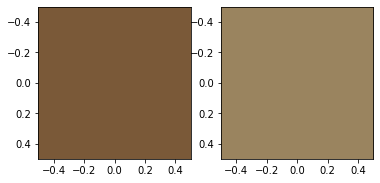

In [ ]:
arr_front = np.asarray(img_front)
arr_persp = np.asarray(img_persp)

a1 = np.array(arr_front[76,113,:]).reshape(1,1,3)
a2 = np.array(arr_persp[81,91,:]).reshape(1,1,3)

plt.figure(1)

plt.subplot(121)
plt.imshow(a1)

plt.subplot(122)
plt.imshow(a2)

**CONVERT RANDOM NUMPY ARRAY INTO IMAGE**

Text(0.5, 1.0, 'Random Array Image')

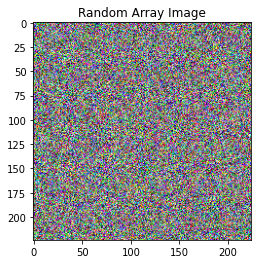

In [ ]:
#Generate a random numpy array
arr = np.random.randint(255, size=(224, 224, 3))
PIL_Image = Image.fromarray(np.uint8(arr))
imshow(PIL_Image)
plt.title('Random Array Image')

In [ ]:
ls

1viewfigs-keble.000.jpg  projgeomfigs-floor.fronto.jpg
1viewfigs-keble.003.jpg  projgeomfigs-floor.persp.jpg
1viewfigs-keble.006.jpg


**GENERATING DOWNSCALED AND GAUSSIAN FILTERED IMAGES**

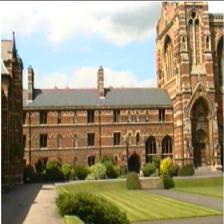

In [ ]:
img = Image.open(new_dir+'/1viewfigs-keble.000.jpg')
img

Text(0.5, 0.98, 'Effect of σ on gaussian filtering')

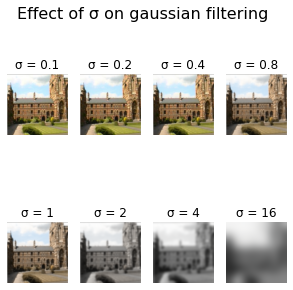

In [ ]:
from scipy.ndimage import filters

sigma = [0.1, 0.2, 0.4, 0.8, 1, 2, 4, 16]
k = 0

fig, ax = plt.subplots(2,4,figsize=(5,5))

img_2 = filters.gaussian_filter(img, 2)

for i in range(2):
  for j in range(4):
    img_2 = filters.gaussian_filter(img, sigma[k])
    ax[i,j].imshow(img_2)
    ax[i,j].axis('off')
    t = '\u03C3 = ' + str(sigma[k])
    ax[i,j].set_title(t)
    k += 1

fig.suptitle("Effect of \u03C3 on gaussian filtering", fontsize=16)

Text(0.5, 1.0, 'Downsample 2 + Gaussian Filter 0.5')

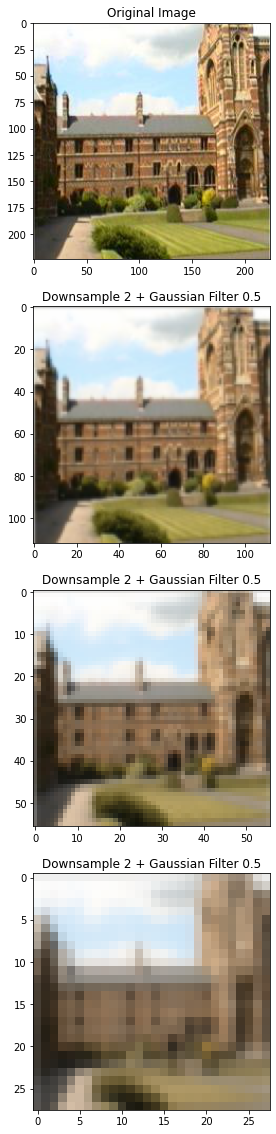

In [ ]:
from skimage.transform import rescale

img_np = np.asarray(img)

plt.figure(figsize=(20,20))

plt.subplot(4,1,1)
imshow(img_np)
plt.title('Original Image')

plt.subplot(4,1,2)
img1 = rescale(img_np,(0.5,0.5,1),anti_aliasing = False)
img1 = filters.gaussian_filter(img1, 0.5)
imshow(img1)
plt.title('Downsample 2 + Gaussian Filter 0.5')

plt.subplot(4,1,3)
img2 = rescale(img1,(0.5,0.5,1),anti_aliasing = False)
img2 = filters.gaussian_filter(img2, 0.5)
imshow(img2)
plt.title('Downsample 2 + Gaussian Filter 0.5')

plt.subplot(4,1,4)
img3 = rescale(img2,(0.5,0.5,1),anti_aliasing = False)
img3 = filters.gaussian_filter(img3, 0.5)
imshow(img3)
plt.title('Downsample 2 + Gaussian Filter 0.5')



**INTEGRAL IMAGE AND SUMMED TABLE SCORES**

In [ ]:
arr = np.random.randint(255, size=(8,8))
arr

array([[ 83,  29,  50, 142, 206, 118,   2, 197],
       [220, 211,  41, 200,  98,  94, 133, 107],
       [157, 175, 227, 204, 232, 127, 138,  85],
       [118,  42,  60,  94, 230,   3, 225, 224],
       [177,  86,  73, 173,  21, 245,  28,  97],
       [ 15, 209, 123, 114, 189, 130, 142, 188],
       [122,  14, 194, 119, 156,  39,  83,  65],
       [ 96, 184, 203, 229,  56, 129, 104,  40]])

In [ ]:
#Integral Image value of pixel is the sum of all the pixels to the left and above it
def integral_image(arr):
  res = []
  for i in range(arr.shape[1]):
    for j in range(arr.shape[0]):
      integral_sum = np.sum(arr[0:i+1,0:j+1])
      res.append(integral_sum)
  res = np.array(res).reshape(arr.shape[1],arr.shape[0])
  return res
integral_image(arr)

array([[  83,  112,  162,  304,  510,  628,  630,  827],
       [ 303,  543,  634,  976, 1280, 1492, 1627, 1931],
       [ 460,  875, 1193, 1739, 2275, 2614, 2887, 3276],
       [ 578, 1035, 1413, 2053, 2819, 3161, 3659, 4272],
       [ 755, 1298, 1749, 2562, 3349, 3936, 4462, 5172],
       [ 770, 1522, 2096, 3023, 3999, 4716, 5384, 6282],
       [ 892, 1658, 2426, 3472, 4604, 5360, 6111, 7074],
       [ 988, 1938, 2909, 4184, 5372, 6257, 7112, 8115]])

In [ ]:
#Calculate sum of given rectangle
res = integral_image(arr)

x1,y1,x2,y2 = (3,4,7,6)
A = res[max(min(y1,y2)-1,0),max(min(x1,x2)-1,0)]
B = res[max(min(y1,y2)-1,0),max(x1,x2)]
C = res[max(y1,y2),max(min(x1,x2)-1,0)]
D = res[max(y1,y2),max(x1,x2)]

print(f"A={A}, B={B}, C={C}, D={D}")
print('Summed Table Score: ',A+D-B-C)

A=1413, B=4272, C=2426, D=7074
Summed Table Score:  1789
